In [9]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt

classification_model = load_model("../Models/TCGA_Multitask_res50_4pred_1.h5")

In [3]:
# test_image = "../Images/TCGA-02-0011-26-flair-wild.png"
# images = [load_img(test_image, target_size=(128,128,3))]*3
# print(np.asarray(images[0]).shape)
# stacked = np.stack(images, axis=-1)
# print(stacked.shape)

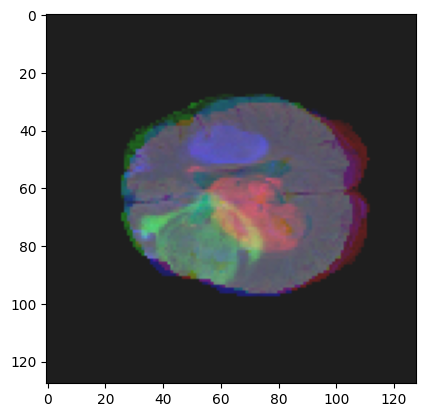

In [14]:
test_image = "../Images/TCGA-02-0011-26-flair-wild.png"
test_image1 = "../Images/TCGA-02-0034-17-flair-wild.png"
test_image2 = "../Images/TCGA-CS-4942-2-flair-mutant.png"

images = [load_img(i, target_size=(128,128,1), color_mode="grayscale") 
          for i in [test_image,test_image1,test_image2]]

# print(np.asarray(images[0]).shape)

stacked = np.stack(images, axis=-1)
# print(stacked.shape)
plt.imshow(stacked)
plt.imsave("../Images/stacked.png", stacked)

In [15]:
# test_image = "../Images/TCGA-02-0011-26-flair-wild.png"
# img = load_img(test_image, target_size=(128,128,3), color_mode="grayscale")
# img_arr = np.asarray(stacked)
# img_arr.shape
img_4d = np.expand_dims(stacked,axis=0)
print(stacked.shape, img_4d.shape)
# img_4d.shape
a = classification_model.predict(img_4d)

(128, 128, 3) (1, 128, 128, 3)
1/1 [==============================] - 1s 830ms/step


In [16]:
class_arr = [['g3','g4'],
             ['mutant','wild'],
             ['codeleted', 'non - codeleted'],
             ['methylated', 'unmethylated']]

# 1 grade: [g3, g4]
# 2 idh: [mutant, wild]
# 3 1p/19q: [codeleted, non - codeleted]
# 4 mgmt: [methylated, unmethylated]
for i in range(4):
    print(class_arr[i][round(a[i][0][0])])

g3
mutant
codeleted
unmethylated
